In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
sns.set()
import seaborn as sns

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.shape

(13320, 9)

In [4]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.dropna().shape

(7496, 9)

In [7]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


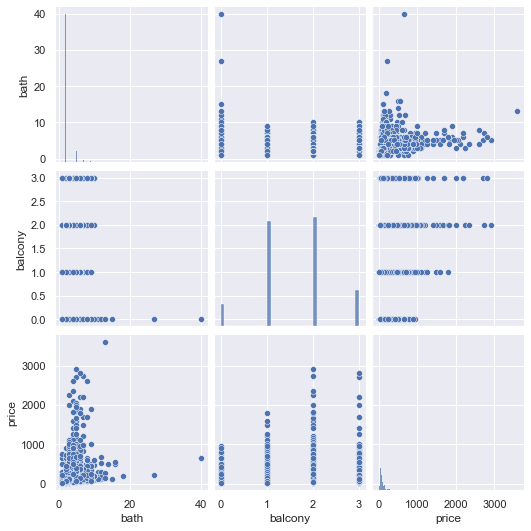

In [9]:
sns.pairplot(df)

<AxesSubplot:>

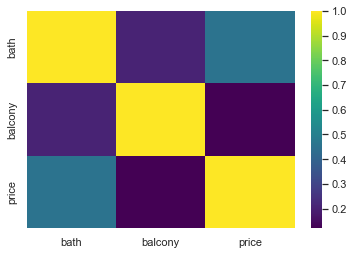

In [10]:
sns.heatmap(df.corr(),cmap='viridis')

/Users/amalmajdua/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='size', ylabel='price'>

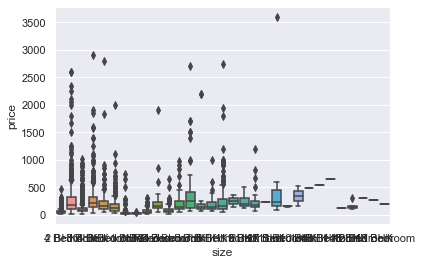

In [11]:
sns.boxplot('size','price',data=df)

In [12]:
category = df.select_dtypes(include=['object']).columns.tolist()

for col in category:
    df[col] = df[col].fillna(df[col].mode())

In [13]:
numeric = df.select_dtypes(include=np.number).columns.tolist()

for col in numeric:
    df[col] = df[col].fillna(df[col].mean())

In [14]:
X = df[numeric]
Y = df['price']

In [15]:
sscaler = preprocessing.StandardScaler()
sscaler.fit(X)
XX = sscaler.transform(X)   #X-1

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(XX, Y, test_size=0.3, random_state=72)

In [17]:
class NeuralNetwork(nn.Module):
        def __init__(self):
            super(NeuralNetwork, self).__init__()
            self.layer1 = nn.Linear(X_train.shape[1], 32) 
            self.layer2 = nn.Linear(32, 128)
            self.layer3 = nn.Linear(128, 1)
            

        def forward(self, x):
            x = F.relu( self.layer1(x) )
            x = F.relu( self.layer2(x) )
            x = self.layer3(x)

            return x



In [18]:
net = NeuralNetwork()
print(net)

NeuralNetwork(
  (layer1): Linear(in_features=3, out_features=32, bias=True)
  (layer2): Linear(in_features=32, out_features=128, bias=True)
  (layer3): Linear(in_features=128, out_features=1, bias=True)
)


In [19]:
#Transformation into tensor
x = torch.tensor(np.array(X_train), dtype=torch.float)
y = torch.tensor(np.array(Y_train).reshape(-1, 1), dtype=torch.float)

In [20]:
optimi = optim.Adam(net.parameters(), lr=0.001)

In [21]:
#loss function
loss_ = nn.MSELoss()

In [22]:
# Epoch
epochs = 1100
finalloss=[]

for i in range(epochs):
  i+=1
  # initialize the gradient of model parameters
  # calculate the loss
  y_val = net(x)
  loss = loss_(y_val, y)
  finalloss.append(loss)
  # Update parameters
  if (i % 5) == 0:
      print('epoch: {},'.format(i) + 'loss: {:.5f}'.format(loss))
  optimi.zero_grad()
  # Backpropagation
  loss.backward()
  optimi.step()

epoch: 5,loss: 35718.71875
epoch: 10,loss: 35647.39062
epoch: 15,loss: 35570.35938
epoch: 20,loss: 35483.49219
epoch: 25,loss: 35382.27344
epoch: 30,loss: 35261.86328
epoch: 35,loss: 35117.77734
epoch: 40,loss: 34945.86719
epoch: 45,loss: 34740.48047
epoch: 50,loss: 34496.47266
epoch: 55,loss: 34209.23047
epoch: 60,loss: 33873.77344
epoch: 65,loss: 33487.19141
epoch: 70,loss: 33045.87109
epoch: 75,loss: 32546.09375
epoch: 80,loss: 31983.89648
epoch: 85,loss: 31355.11328
epoch: 90,loss: 30656.74805
epoch: 95,loss: 29887.47852
epoch: 100,loss: 29046.41797
epoch: 105,loss: 28133.19141
epoch: 110,loss: 27148.74805
epoch: 115,loss: 26095.32617
epoch: 120,loss: 24978.14453
epoch: 125,loss: 23803.79102
epoch: 130,loss: 22580.60742
epoch: 135,loss: 21318.20117
epoch: 140,loss: 20029.19922
epoch: 145,loss: 18726.65820
epoch: 150,loss: 17425.06641
epoch: 155,loss: 16140.06055
epoch: 160,loss: 14889.94922
epoch: 165,loss: 13690.13770
epoch: 170,loss: 12554.42773
epoch: 175,loss: 11493.14160
epoch

In [23]:
# Prediction
Y_train_pred = net(torch.tensor(X_train, dtype=torch.float))
Y_test_pred = net(torch.tensor(X_test, dtype=torch.float))



In [24]:
Y_train_pred = Y_train_pred.detach().numpy()
Y_test_pred = Y_test_pred.detach().numpy()

In [25]:

R= r2_score(Y_test, Y_test_pred)
print(R)



0.999779435191194
